# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Exercise 4

## Part A

In [2]:
col_names = ["X1", "X2", "X3", "X4"]
toy_data = pd.read_csv( "https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/toy_missing.txt", names=col_names, sep='\t' )

n_obs = toy_data.shape[0]

for var in col_names:
    print( f"Mean for variable {var}: {toy_data[var].sum()/n_obs}" )

Mean for variable X1: -0.037666
Mean for variable X2: -0.05285999999999999
Mean for variable X3: 0.24635
Mean for variable X4: 0.28981799999999996


## Part B

In [3]:
for var in col_names:
    print( f"Mean for variable {var}: {toy_data[var].mean()}" )

Mean for variable X1: -0.037666
Mean for variable X2: -0.07960843373493975
Mean for variable X3: 0.3885646687697161
Mean for variable X4: 0.436472891566265


## Part C

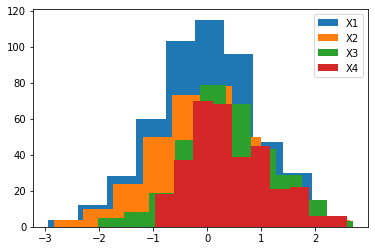

In [4]:
for var in col_names:
    plt.hist(toy_data[var], label=var)
    plt.legend()
    # plt.show()

## Part D

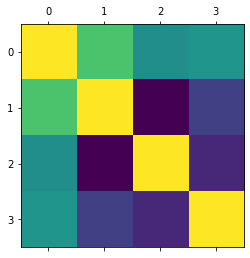

          X1        X2        X3        X4
X1  1.000000  0.805627  0.651844  0.671106
X2  0.805627  1.000000  0.312451  0.443313
X3  0.651844  0.312451  1.000000  0.388432
X4  0.671106  0.443313  0.388432  1.000000


In [5]:
corr_matrix = toy_data.corr()

plt.matshow(corr_matrix)
plt.show()

print(corr_matrix)

## Part E

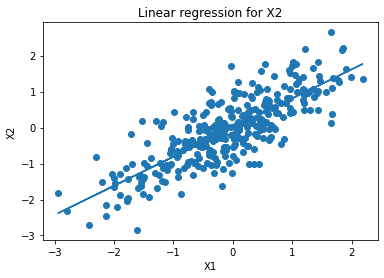

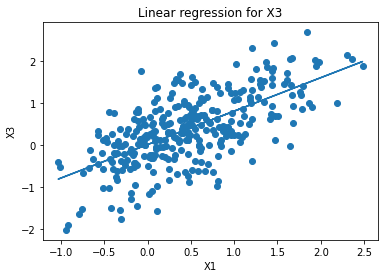

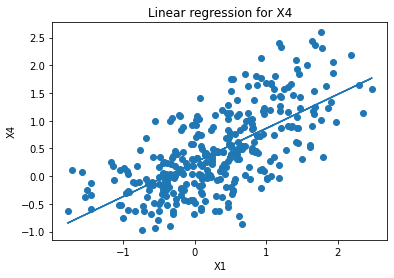

In [6]:
def regress(data, col_name):
    data = data[ ["X1", col_name] ].dropna()
    covariate = data["X1"].values.reshape(-1, 1)
    faulty_data = data[col_name].values.reshape(-1, 1)
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(covariate, faulty_data)  # perform linear regression
    prediction = linear_regressor.predict(covariate)  # make predictions
    plt.scatter(covariate, faulty_data)
    plt.plot(covariate, prediction)
    plt.title(f"Linear regression for {col_name}")
    plt.xlabel("X1")
    plt.ylabel(col_name)
    plt.show()
regress(toy_data, "X2")
regress(toy_data, "X3")
regress(toy_data, "X4")